<a href="https://colab.research.google.com/github/touhid-sovon/machine_learning/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplot lib style
plt.style.use('bmh')


Mounting the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/DataSet/Exploratory Data Analysis/Project 1/train.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# counting all the null values
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [9]:
# printing all the columns null value
print(df.isnull().sum().to_string())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# creating a new column with by removing columns which has more than 30% missing value

In [10]:
# len return the total number of rows in a data frame
len(df)
# the code is same as len(df['LotFrontage']) which will return a single columns total value or rows

1460

In [11]:
df.count() # return the total non-missing or non-NaN values of each columns

,0
Id,1460
MSSubClass,1460
MSZoning,1460
LotFrontage,1201
LotArea,1460
...,...
MoSold,1460
YrSold,1460
SaleType,1460
SaleCondition,1460


In [12]:
df['LotFrontage'].count() # returns a single columns total non-missing values

1201

In [13]:
df['LotFrontage'].isnull().sum() # getting the missing values of a certain column

259

In [14]:
df['LotFrontage'].count()/len(df) # measuring the percentage of missing values of a certain column

0.8226027397260274

In [15]:
# creating new data frame with columns that has more than 30% missing value
df_2 = df[[column for column in df if df[column].count()/len(df) >= 0.3]]

In [16]:
# deleting the id
del df_2['Id']

In [17]:
#printing the list of dropped columns
print("Dropped Columns:",end=" ")
for column in df.columns:
  if column not in df_2.columns:
    print(column, end=", ")

Dropped Columns: Id, Alley, PoolQC, Fence, MiscFeature, 

In [18]:
# printing all the columns null value
print(df_2.isnull().sum().to_string())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [19]:
# understanding the correlation by using the tips data set
tips = sns.load_dataset('tips')
numeric_tips = tips.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_tips.corr()
print(corr_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


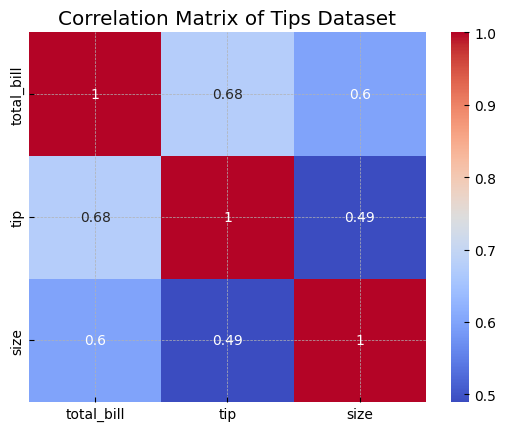

In [20]:
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Tips Dataset")
plt.show()

In [21]:
# coming back to the original data dataframe
# now take a look at how the price is distributed
df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<ipython-input-22-9bde65fb659c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g',bins=100,hist_kws ={'alpha':0.4})


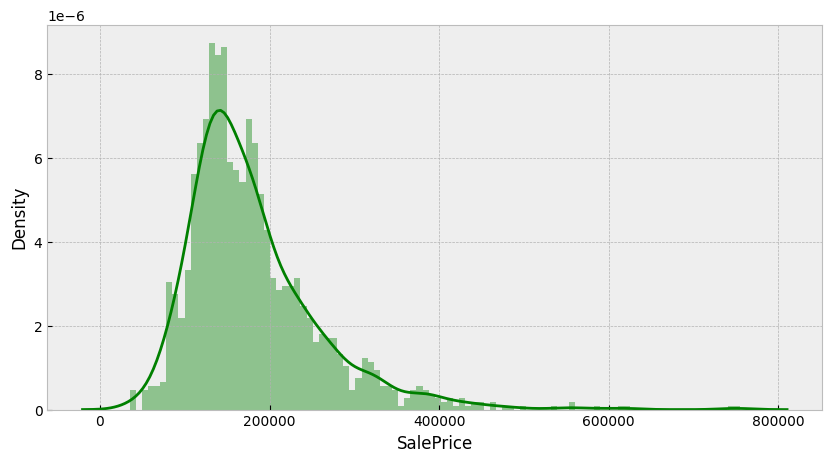

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'], color='g',bins=100,hist_kws ={'alpha':0.4})
plt.show()

# Numerical Data Distribution
for this part lets look at the distributions by plotting them.

In [23]:
# lets first list all the data types of our data from our dataset and takeonly the numeric ones:
list(set(df_2.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [24]:
# creating a dataframe containing only numbers
df_num = df_2.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

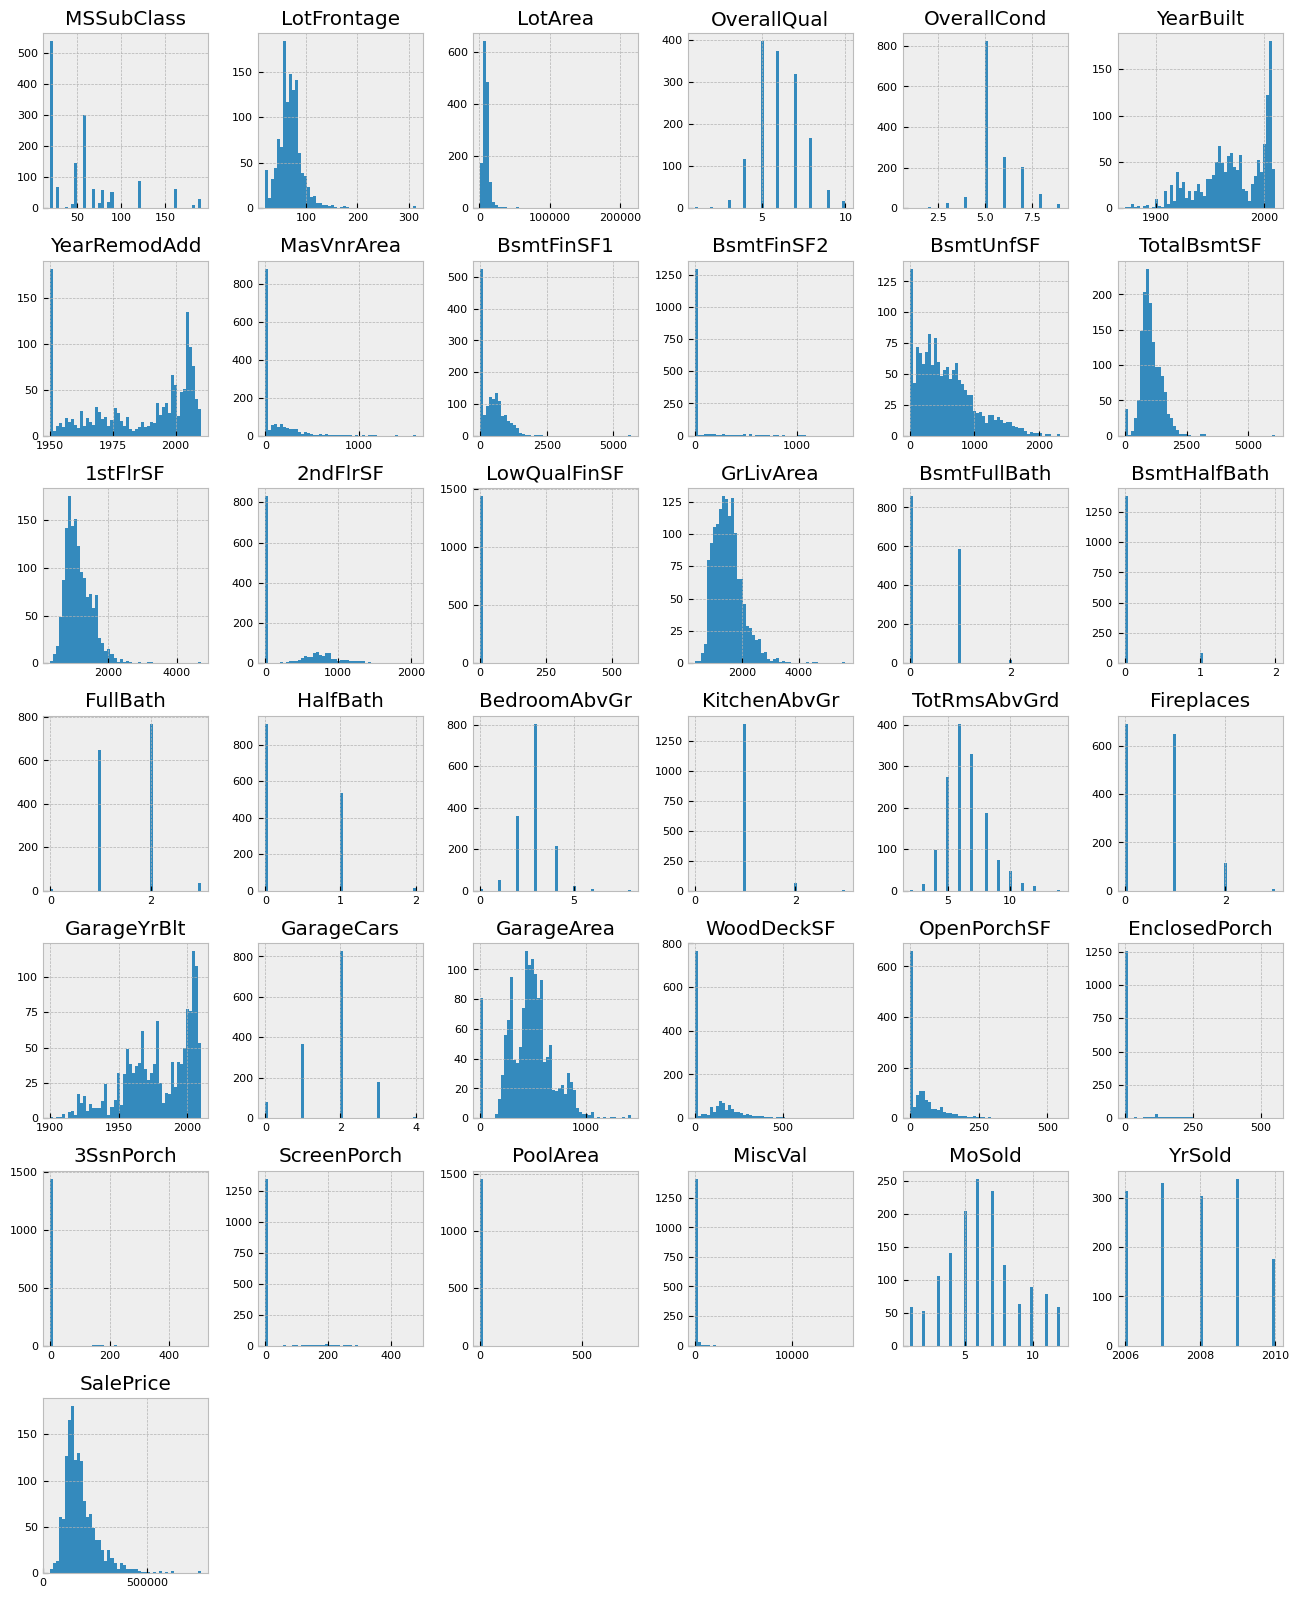

In [25]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8) # using pandas dataframe.hist() method .this methodis easy and quick to plot histogram for all numeric columns in a dataframe

some columns shows similar distribution

# Correlation
Now I will find the features which are strongly connected "SalePrice".



In [26]:
df_num_corr = df_num.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending = False)
print(f"There is {len(golden_features_list)} features that are connected with SalePrice : \n {golden_features_list}")

There is 10 features that are connected with SalePrice : 
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

Plot the numerical features and see which ones have very few or explainable outliers
Remove the outliers from these features and see which one can have a good correlation without their outliers
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern

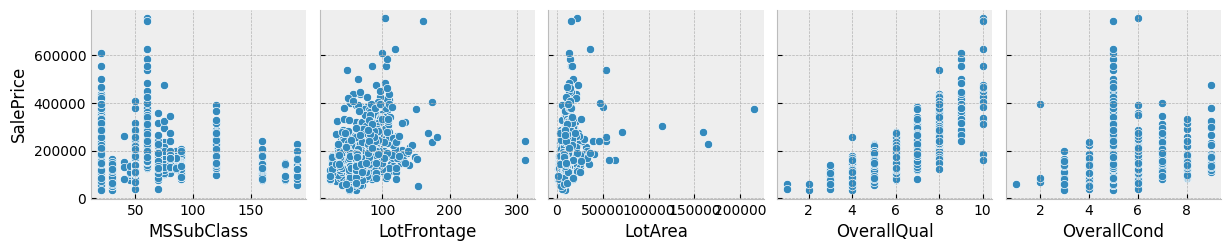

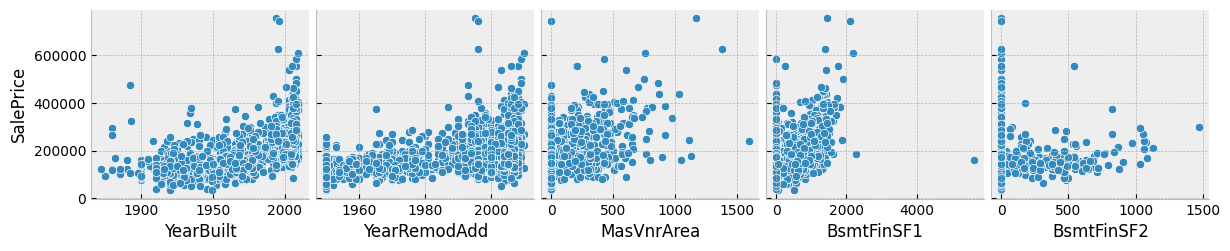

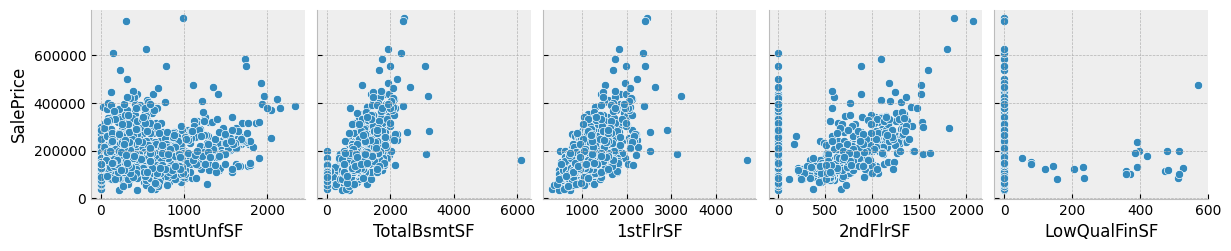

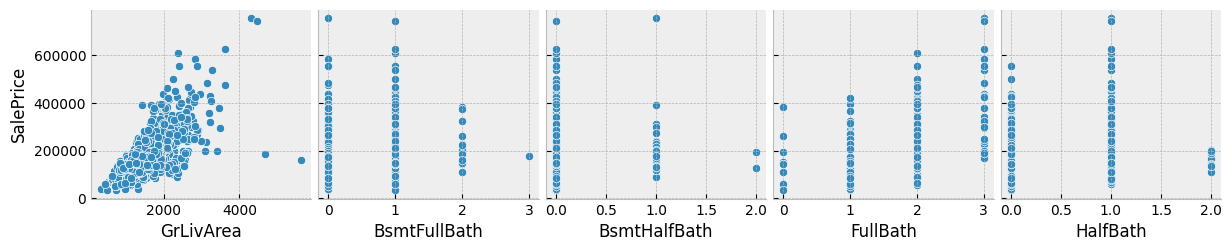

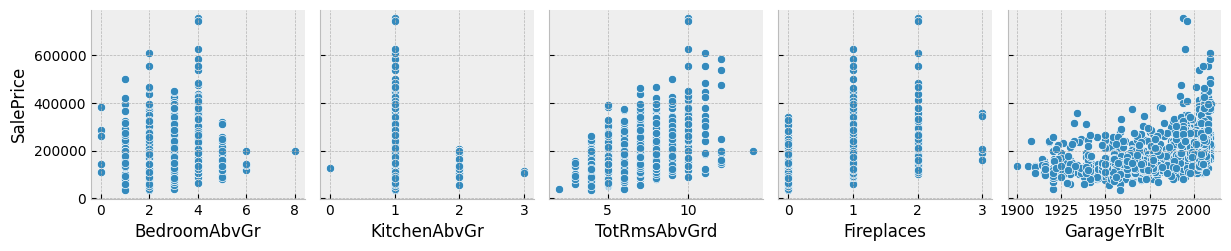

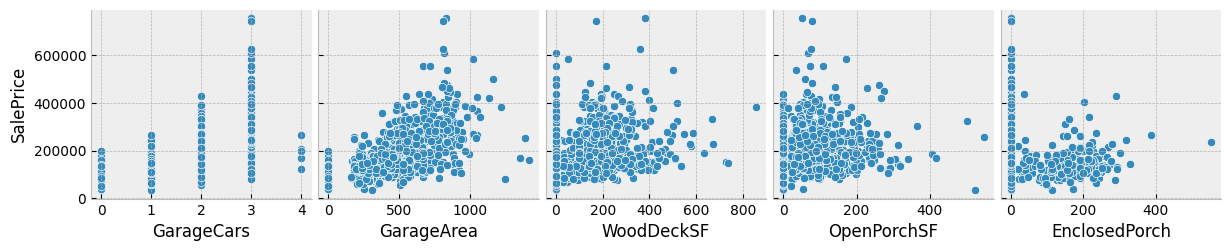

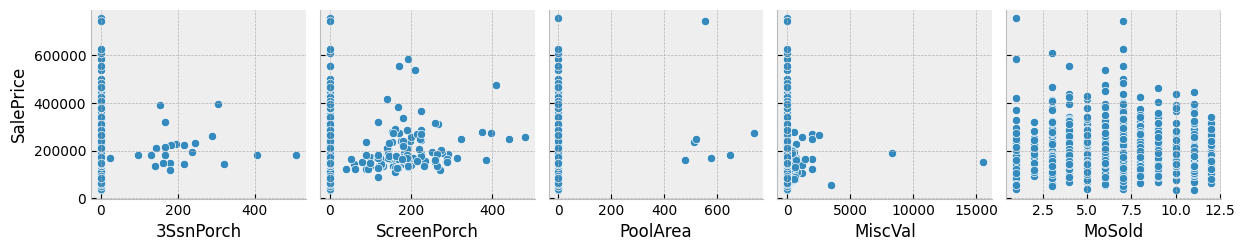

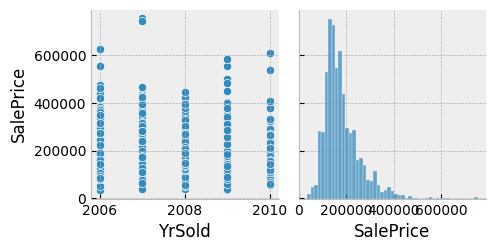

In [27]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

Now remove the 0s

In [30]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print(f"{key:>15}: {value:>15}")

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

<ipython-input-30-ad0994194d19>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}


Very interesting! We found another strongly correlated value by cleaning up the data a bit. Now our golden_features_list var looks like this:



In [29]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


We found strongly correlated predictors with `SalePrice`. Later with feature engineering we may add dummy values where value of a given feature > 0 would be 1 (precense of such feature) and 0 would be 0.
For `2ndFlrSF` for example, we could create a dummy value for its precense or non-precense and finally sum it up to `1stFlrSF`.

# Conclusion
By looking at correlation between numerical values we discovered 11 features which have a strong relationship to a house price. Besides correlation we didn't find any notable pattern on the datas which are not correlated.

Notes:

There may be some patterns I wasn't able to identify due to my lack of expertise
Some values such as GarageCars -> SalePrice or Fireplaces -> SalePrice shows a particular pattern with verticals lines roughly meaning that they are discrete variables with a short range but I don't know if they need some sort of "special treatment".

# Feature to feature relationship
Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

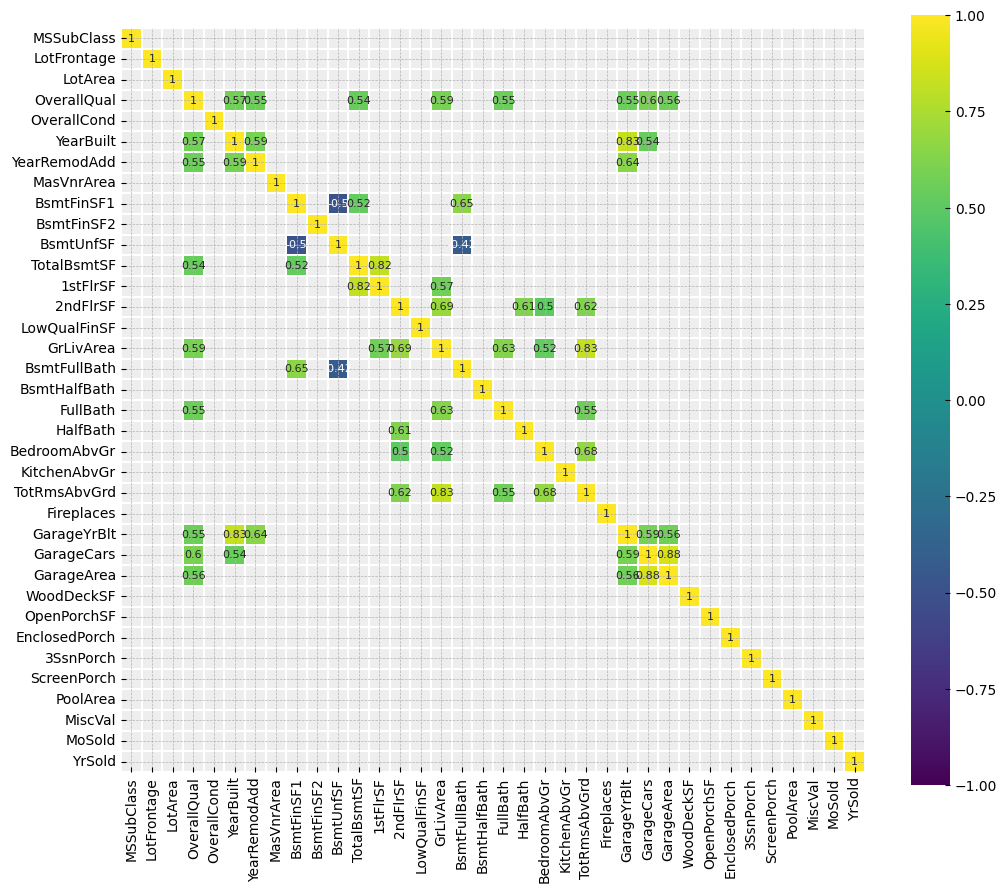

In [31]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

Now for the ones which are less obvious we can see that:

* There is a strong negative correlation between BsmtUnfSF (Unfinished square
feet of basement area) and `BsmtFinSF2` (Type 2 finished square feet). There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.
* `HalfBath/2ndFlrSF` is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom (I'll consider that when I'll buy myself a house uh...)
There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) and others indicates that people expect multiples features to be packaged together.